In [3]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')

# Reset index and display first five rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


C:\Users\black\AppData\Local\Temp\ipykernel_87884\2827900585.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Load the 10-Q filing
url = "https://www.sec.gov/Archives/edgar/data/1318605/000162828025018911/tsla-20250331.htm"
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all tables
tables = soup.find_all('table')

# Try parsing each table to find revenue-related data
revenue_tables = []
for table in tables:
    df_list = pd.read_html(str(table))
    for df in df_list:
        if df.shape[1] > 1 and df.columns.str.contains("Revenue", case=False).any():
            revenue_tables.append(df)

# Display the first matching table
if revenue_tables:
    print(revenue_tables[0])
else:
    print("No revenue table found.")

No revenue table found.


In [12]:
tesla_revenue = pd.DataFrame(revenue_data, columns=["Date", "Revenue"])
print(tesla_revenue.tail())



Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [20]:
print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>SEC.gov | Your Request Originates from an Undeclared Automated Tool</title>
<style>
html {height: 100%}
body {height: 100%; margin:0; padding:0;}
#header {background-color:#003968; color:#fff; padding:15px 20px 10px 20px;font-family:Arial, Helvetica, sans-serif; font-size:20px; border-bottom:solid 5px #000;}
#footer {background-color:#003968; color:#fff; padding:15px 20px;font-family:Arial, Helvetica, sans-serif; font-size:20px;}
#content {max-width:650px;margin:60px auto; padding:0 20px 100px 20px; background-image:url(seal_bw.png);background-repeat:no-repeat;background-position:50% 100%;}
h1 {font-family:Georgia, Times, serif; font-size:20px;}
h2 {text-align:center; font-family:Georgia, Times, serif; font-size:20px; width:100%; border-bot

In [33]:
import requests
import pandas as pd

api_key = 'enter your own api here'
symbol = 'TSLA'
url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={api_key}'

response = requests.get(url)
data = response.json()

# Extract and clean annual revenue data
annual_reports = data.get('annualReports', [])
revenue_data = []

for report in annual_reports:
    fiscal_year = report.get('fiscalDateEnding')
    revenue_str = report.get('totalRevenue')
    
    if revenue_str and revenue_str.isdigit():
        revenue = int(revenue_str)
        revenue_data.append({'Fiscal Year': fiscal_year, 'Revenue': revenue})

# Convert to DataFrame
df = pd.DataFrame(revenue_data)
df['Revenue'] = df['Revenue'] / 1e9  # Convert to billions
df.sort_values('Fiscal Year', ascending=False, inplace=True)
print(df.tail())


   Fiscal Year   Revenue
13  2011-12-31  0.204242
14  2010-12-31  0.116744
15  2009-12-31  0.111943
16  2008-12-31  0.014742
17  2007-12-31  0.000073


In [29]:
import requests
import pandas as pd

api_key = 'enter your own api here'
symbol = 'GME'
url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={api_key}'

response = requests.get(url)
data = response.json()

# Extract and clean annual revenue data
annual_reports = data.get('annualReports', [])
gme_revenue_data = []

for report in annual_reports:
    fiscal_year = report.get('fiscalDateEnding')
    revenue_str = report.get('totalRevenue')
    
    if revenue_str and revenue_str.isdigit():
        revenue = int(revenue_str)
        gme_revenue_data.append({'Fiscal Year': fiscal_year, 'Revenue': revenue})

# Create DataFrame
gme_revenue = pd.DataFrame(gme_revenue_data)
gme_revenue['Revenue'] = gme_revenue['Revenue'] / 1e9  # Convert to billions
gme_revenue.sort_values('Fiscal Year', ascending=False, inplace=True)

# Display last five rows
gme_revenue.tail()


,Fiscal Year,Revenue
15,2010-01-31,9.078000
16,2009-01-31,8.805897
17,2008-01-31,7.093962
18,2007-01-31,5.318900
19,2006-01-31,3.091783


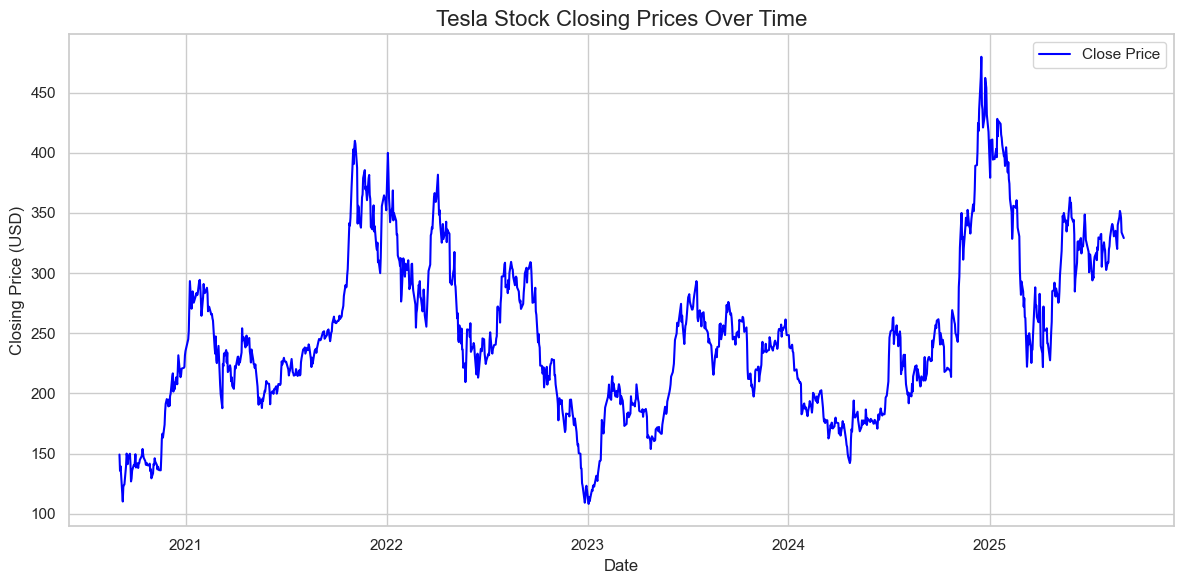

In [30]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Load Tesla stock data
tsla = yf.Ticker("TSLA")
tsla_data = tsla.history(period="5y")

# Reset index if needed
tsla_data.reset_index(inplace=True)

# Plotting function
def make_graph(data, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title, fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function with Tesla data
make_graph(tsla_data, "Tesla Stock Closing Prices Over Time")


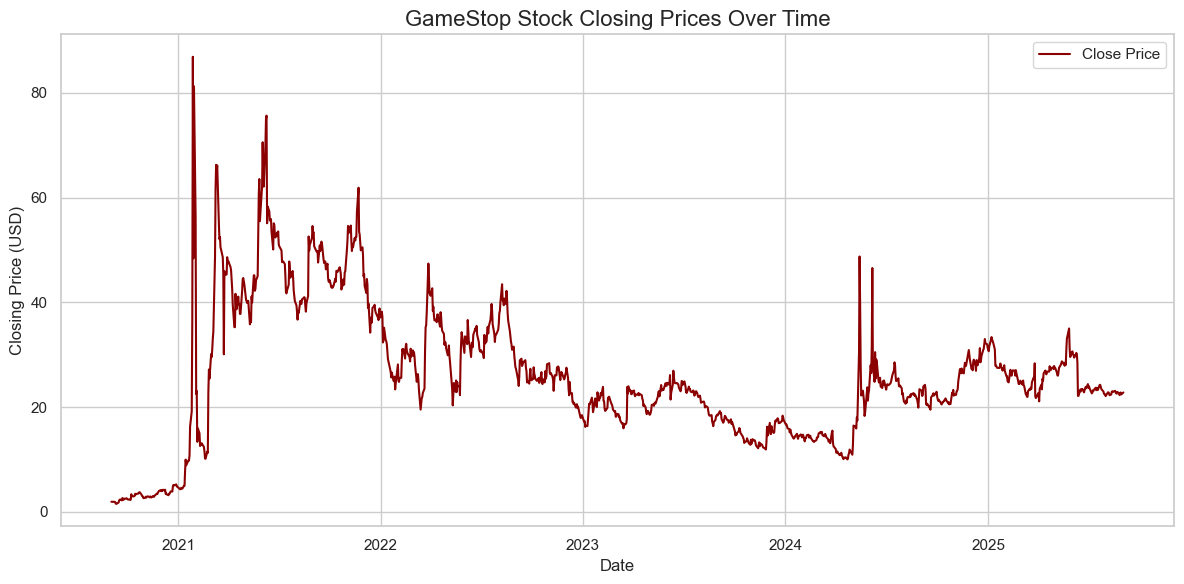

In [31]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Load GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="5y")

# Reset index
gme_data.reset_index(inplace=True)

# Plotting function
def make_graph(data, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='darkred')
    plt.title(title, fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function with GME data
make_graph(gme_data, "GameStop Stock Closing Prices Over Time")
